In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid ="eb37404a619747e8b43050b7d040c682" 
secret = "7ef48f706ccd4eef88e1a20149dcbe29"

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


Spotify uses attributes as metrics to describe songs that are available on its platforms. The following would be the descriptions of the respective attributes: 

a) danceability: Measure of how suitable the song is danceable. 0.0 (Least Danceable) - 1.0 (Most Danceable)

b) energy: Measure of intensity and activity. 0.0 (Least Energy) - 1.0 (Highest Energy) 

c) loudness: Measure of the sound's intensity. -60 (Softest) - 0 (Loudest) 

d) speechiness: Measure of the presence of words in a song. 0.0 (Non-speech) - 1.0 (Very Speechy)

e) acousticness: Measure of how acoustic a song is. 0.0 (Least Confidence) - 1.0 (Most Confidence)

f) instrumentalness: Predicts whether track contains no vocal. 0.0 (Completely Vocal) - 1.0 (No Vocal Content)

g) liveness: Measure of whether song is performed live. 0.0 (Least likelihood to be performed live) - 1.0 (Strongest likelihood to be performed live)

h) valence: Measure of positiveness of the song. 0.0 (Most Negative) - 1.0 (Most Positive)

i) tempo: Measure of average beat duration.


In [2]:
search = input("What's the name of the artist you want to search? ")

#Getting the artist ID to be used
artist = sp.search(search,1,0, "artist")
if(artist['artists']['items'] != []):
    artist_item = artist['artists']['items'][0]
    artist_id = artist_item['id']
    artist_name = artist_item['name']

    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    count = 0
    danceability = 0
    energy = 0 
    loudness = 0 
    speechiness = 0 
    acousticness = 0 
    instrumentalness = 0
    liveness = 0 
    valence = 0
    tempo = 0 
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            count += 1
            track_id = track_item['id']
            track_info = sp.audio_features(track_id)[0]
            danceability += track_info['danceability']
            energy += track_info['energy']
            loudness += track_info['loudness']
            speechiness += track_info['speechiness']
            acousticness += track_info['acousticness']
            instrumentalness += track_info['instrumentalness']
            liveness += track_info['liveness']
            valence += track_info['valence']
            tempo += track_info['tempo']
            #print(track_item['name'])
            #print(track_info)

    #Showing Average Stats of Artist 
    a_danceability = danceability / count
    a_energy = energy / count
    a_loudness = energy / count
    a_speechiness = speechiness / count
    a_acousticness = acousticness / count
    a_instrumentalness = instrumentalness / count 
    a_liveness = liveness / count 
    a_valence = valence / count 
    a_tempo = tempo / count 

    print()
    print("Average Stats for " + artist_name)
    print("Danceability: " + str(a_danceability))
    print("Energy: " + str(a_energy))
    print("Loudness: " + str(a_loudness))
    print("Speechiness: " + str(a_speechiness))
    print("Acousticness: " + str(a_acousticness))
    print("Instrumentalness: " + str(a_instrumentalness))
    print("Liveness: " + str(a_liveness))
    print("Valence: " + str(a_valence))
    print("Tempo: " + str(a_tempo))
else: 
    print("No Artist Found!")

What's the name of the artist you want to search? Justin Bieber

Average Stats for Justin Bieber
Danceability: 0.5966870229007634
Energy: 0.6343679389312981
Loudness: 0.6343679389312981
Speechiness: 0.06883969465648856
Acousticness: 0.26179873282442745
Instrumentalness: 0.005121177938931297
Liveness: 0.18709083969465648
Valence: 0.5138442748091601
Tempo: 116.43290839694652


In [3]:
username = "Spotify"
playlist_id = "37i9dQZF1DWXjg4w8L3Now"
top_50 = sp.user_playlist_tracks(username, playlist_id=playlist_id)
top_50_items = top_50['items']
top_50_dict = {}
for top_50_item in top_50_items:
    track = top_50_item['track']
    main_artist = track['artists'][0]
    top_50_dict[main_artist['name']] = main_artist['id']
print(top_50_dict)

def artist_stats(artist_id):
    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    if(album_items == []):
        return []
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    count = 0
    danceability = 0
    energy = 0 
    loudness = 0 
    speechiness = 0 
    acousticness = 0 
    instrumentalness = 0
    liveness = 0 
    valence = 0
    tempo = 0 
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            count += 1
            track_id = track_item['id']
            track_info = sp.audio_features(track_id)[0]
            danceability += track_info['danceability']
            energy += track_info['energy']
            loudness += track_info['loudness']
            speechiness += track_info['speechiness']
            acousticness += track_info['acousticness']
            instrumentalness += track_info['instrumentalness']
            liveness += track_info['liveness']
            valence += track_info['valence']
            tempo += track_info['tempo']
            #print(track_item['name'])
            #print(track_info)

    #Showing Average Stats of Artist 
    a_danceability = danceability / count
    a_energy = energy / count
    a_loudness = energy / count
    a_speechiness = speechiness / count
    a_acousticness = acousticness / count
    a_instrumentalness = instrumentalness / count 
    a_liveness = liveness / count 
    a_valence = valence / count 
    a_tempo = tempo / count 
    
    average =  [a_danceability, a_energy, a_loudness, a_speechiness, a_acousticness, a_instrumentalness, a_liveness, a_valence,
               a_tempo]

    return average

stats = {}
#print(artist_stats("3TVXtAsR1Inumwj472S9r4"))
for key in top_50_dict:
        stats[key] = artist_stats(top_50_dict[key])
    
print(stats['Drake'])


{'Drake': '3TVXtAsR1Inumwj472S9r4', 'Post Malone': '246dkjvS1zLTtiykXe5h60', 'XXXTENTACION': '15UsOTVnJzReFVN1VCnxy4', 'J Balvin': '1vyhD5VmyZ7KMfW5gqLgo5', 'Ed Sheeran': '6eUKZXaKkcviH0Ku9w2n3V', 'Eminem': '7dGJo4pcD2V6oG8kP0tJRR', 'Ozuna': '1i8SpTcr7yvPOmcqrbnVXY', 'Bad Bunny': '4q3ewBCX7sLwd24euuV69X', 'Khalid': '6LuN9FCkKOj5PcnpouEgny', 'Ariana Grande': '66CXWjxzNUsdJxJ2JdwvnR', 'Kendrick Lamar': '2YZyLoL8N0Wb9xBt1NhZWg', 'Imagine Dragons': '53XhwfbYqKCa1cC15pYq2q', 'Travis Scott': '0Y5tJX1MQlPlqiwlOH1tJY', 'Dua Lipa': '6M2wZ9GZgrQXHCFfjv46we', 'The Weeknd': '1Xyo4u8uXC1ZmMpatF05PJ', 'Kanye West': '5K4W6rqBFWDnAN6FQUkS6x', 'David Guetta': '1Cs0zKBU1kc0i8ypK3B9ai', 'BTS': '3Nrfpe0tUJi4K4DXYWgMUX', 'Maroon 5': '04gDigrS5kc9YWfZHwBETP', 'Cardi B': '4kYSro6naA4h99UJvo89HB', 'Marshmello': '64KEffDW9EtZ1y2vBYgq8T', 'Migos': '6oMuImdp5ZcFhWP0ESe6mG', 'Shawn Mendes': '7n2wHs1TKAczGzO7Dd2rGr', 'Taylor Swift': '06HL4z0CvFAxyc27GXpf02', 'Camila Cabello': '4nDoRrQiYLoBzwC5BhVJzF', 'Calvin Harr

In [35]:
def top_artists_write(stats):
    import csv
    if(stats == {}):
        return False
    with open('top_artists_stats.csv', mode='w') as csv_file:
        fieldnames = ['Name', 'Danceability','Energy', 'Loudness', 'Speechiness' ,
                      'Acousticness', 'Instrumentalness', 'Liveness' , 'Valence' ,
                      'Tempo']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for key in stats:
            if(len(stats[key]) != 9):
                return False
            writer.writerow({"Name": key, 'Danceability': stats[key][0], 'Energy': stats[key][1]
                            ,'Loudness':stats[key][2], 'Speechiness':stats[key][3], 'Acousticness':stats[key][4]
                            , 'Instrumentalness':stats[key][5], 'Liveness':stats[key][6], 'Valence':stats[key][7], 
                            'Tempo':stats[key][8]})
    return True 

bad = {}
top_artists_write(bad)

False

In [5]:
#del stats['Martin Garrix']
print(len(stats))

49


In [9]:
import pandas as pd 
stat = pd.DataFrame.from_dict(stats, orient='index', columns = ['Danceability', 'Energy', 
                                                         'Loudness', 'Speechiness', 
                                                         'Acousticness', 'Instrumentalness', 
                                                         'Liveness', 'Valence', 'Tempo'])

In [37]:
import pandas as pd 

def all_artist_songs(artist_id):
    #To retrieve the ID on each album by the artist
    album_ids = []
    album_catalog = sp.artist_albums(artist_id, album_type = "album", country = "SG")
    album_items = album_catalog['items']
    #print(album_catalog['items'][0])
    if(album_items == []):
        return []
    for album_item in album_items:
        album_ids.append(album_item['id'])

    #To retrieve track IDs on the album and their relevant information
    track_list = {}
    for album_id in album_ids:
        album_tracks = sp.album_tracks(album_id) 
        track_items = album_tracks['items']
        for track_item in track_items:
            track_id = track_item['id']
            track_name = track_item['name']
            track_info = sp.audio_features(track_id)[0]
            song = [track_info['danceability'],
                    track_info['energy'],
                    track_info['loudness'],
                    track_info['speechiness'],
                    track_info['acousticness'],
                    track_info['instrumentalness'],
                    track_info['liveness'],
                    track_info['valence'],
                    track_info['tempo']]
            track_list[track_name] = song
        

    return track_list

search = input("What's the name of the artist you want to search? ")
artist = sp.search(search,1,0, "artist")
if(artist['artists']['items'] != []):
    artist_item = artist['artists']['items'][0]
    artist_id = artist_item['id']
    artist_name = artist_item['name']
    track_list = all_artist_songs(artist_id)
    table = pd.DataFrame.from_dict(track_list, orient='index', columns = ['Danceability', 'Energy', 
                                                         'Loudness', 'Speechiness', 
                                                         'Acousticness', 'Instrumentalness', 
                                                         'Liveness', 'Valence', 'Tempo'])
else:
    print("No Artist Found")


What's the name of the artist you want to search? Justin Bieber


In [41]:
def artist_repetoire(artist_name, songs): 
    import csv
    if(stats == {}):
        return False
    filename = artist_name + '.csv'
    with open(filename, mode='w') as csv_file:
        fieldnames = ['Song Name', 'Danceability','Energy', 'Loudness', 'Speechiness' ,
                      'Acousticness', 'Instrumentalness', 'Liveness' , 'Valence' ,
                      'Tempo']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        
        writer.writeheader()
        for key in songs:
            if(len(songs[key]) != 9):
                return False
            writer.writerow({"Song Name": key, 'Danceability': songs[key][0], 'Energy': songs[key][1]
                            ,'Loudness':songs[key][2], 'Speechiness':songs[key][3], 'Acousticness':songs[key][4]
                            , 'Instrumentalness':songs[key][5], 'Liveness':songs[key][6], 'Valence':songs[key][7], 
                            'Tempo':songs[key][8]})
    return True 

artist_repetoire(search, track_list)

True

In [40]:
table1 = table[['Energy', 'Valence']]
table

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Mark My Words,0.383,0.2560,-8.572,0.0332,0.88000,0.000003,0.1690,0.5190,114.188
I'll Show You,0.361,0.6080,-6.757,0.0980,0.05000,0.000080,0.1830,0.0789,191.812
What Do You Mean?,0.845,0.5670,-8.118,0.0956,0.59000,0.001420,0.0811,0.7930,125.020
Sorry,0.654,0.7600,-3.669,0.0450,0.07970,0.000000,0.2990,0.4100,99.945
Love Yourself,0.609,0.3780,-9.828,0.4380,0.83500,0.000000,0.2800,0.5150,100.418
Company,0.590,0.7970,-4.901,0.0614,0.13200,0.000000,0.0846,0.4250,94.948
No Pressure,0.644,0.5950,-6.877,0.2150,0.12100,0.000000,0.2790,0.5540,148.889
No Sense,0.643,0.4990,-6.795,0.0308,0.04780,0.000000,0.1080,0.3630,133.978
The Feeling,0.525,0.8090,-6.185,0.0619,0.08190,0.000001,0.0971,0.2100,127.073
Life Is Worth Living,0.558,0.2960,-9.180,0.0427,0.90700,0.000000,0.1080,0.4630,76.040


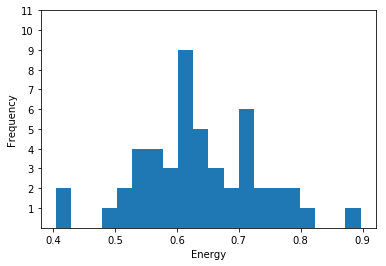

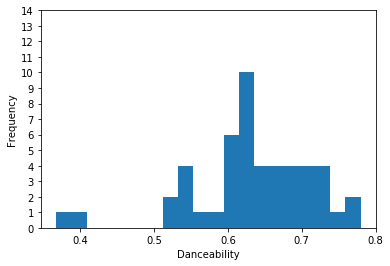

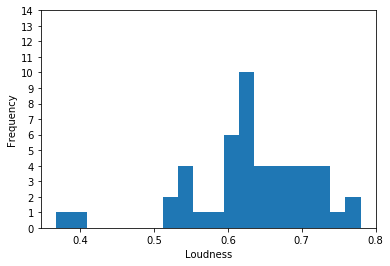

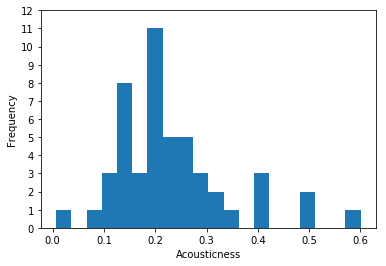

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = stat['Energy'].sort_values()
default_bins = 20

energy = plt.hist(x, bins = default_bins)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.yticks(range(1, 12))
plt.show()

dance = stat['Danceability'].sort_values()

y = plt.hist(dance, bins = default_bins)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.yticks(range(0, 15))
plt.show()

loud = stat['Loudness'].sort_values()

y = plt.hist(dance, bins = default_bins)
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.yticks(range(0, 15))
plt.show()

acoustic = stat['Acousticness'].sort_values()

y = plt.hist(acoustic, bins = default_bins)
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.yticks(range(0, 13))
plt.show()




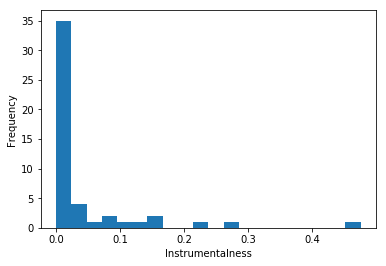

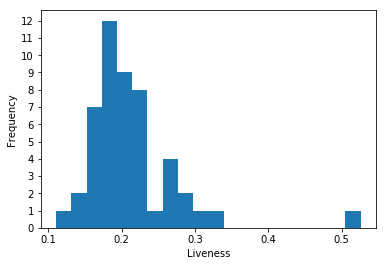

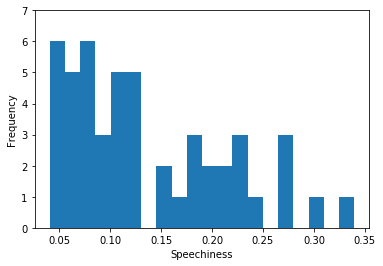

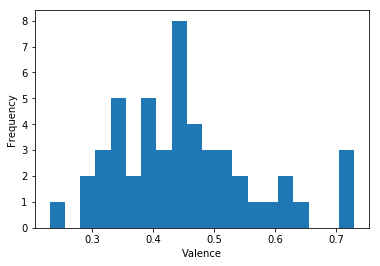

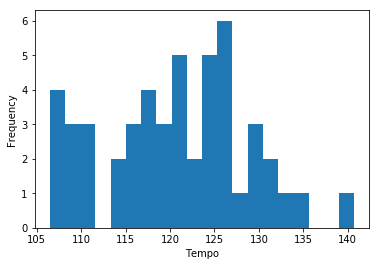

In [20]:
instrumental = stat['Instrumentalness'].sort_values()

default_bins = 20
y = plt.hist(instrumental, bins = default_bins)
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.yticks(range(0, 40, 5))
plt.show()

liveness = stat['Liveness'].sort_values()

y = plt.hist(liveness, bins = default_bins)
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.yticks(range(0, 13))
plt.show()

speech = stat['Speechiness'].sort_values()

y = plt.hist(speech, bins = default_bins)
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.yticks(range(0, 8))
plt.show()

valence = stat['Valence'].sort_values()

y = plt.hist(valence, bins = default_bins)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.yticks(range(0, 9))
plt.show()

tempo = stat['Tempo'].sort_values()

y = plt.hist(tempo, bins = default_bins)
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.yticks(range(0, 7))
plt.show()

In [45]:
def file_read(filename):
    import csv
    result = {}
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        artist_name = False
        song_name = False
        for row in csv_reader:
            if line_count == 0:
                if(row.get('Name') != None):
                    artist_name = True
                elif(row.get('Song Name') != None):
                    song_name = True
                line_count += 1    
            if(artist_name == True):
                result[row['Name']] = [row['Danceability'],row['Energy'], row['Loudness'], row['Speechiness'] ,
                      row['Acousticness'], row['Instrumentalness'], row['Liveness'] , row['Valence'] ,
                      row['Tempo']]
            elif(song_name == True):
                result[row['Song Name']] = [row['Danceability'],row['Energy'], row['Loudness'], row['Speechiness'] ,
                      row['Acousticness'], row['Instrumentalness'], row['Liveness'] , row['Valence'] ,
                      row['Tempo']]
    return result

jb = file_read('Justin Bieber.csv')
top = file_read('top_artists_stats.csv')

In [61]:
new = pd.DataFrame.from_dict(top, orient='index', columns = ['Danceability', 'Energy', 
                                                         'Loudness', 'Speechiness', 
                                                         'Acousticness', 'Instrumentalness', 
                                                         'Liveness', 'Valence', 'Tempo'])
new

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Drake,0.6693141592920353,0.542216814159292,0.542216814159292,0.22837699115044238,0.18511302212389388,0.00371647685840708,0.1923221238938054,0.3423460176991151,118.1047256637168
Post Malone,0.6239117647058823,0.6113970588235295,0.6113970588235295,0.07400441176470586,0.3223426470588236,0.0160560169117647,0.1415235294117647,0.3386617647058824,125.96169117647057
XXXTENTACION,0.6945063291139242,0.42112987341772146,0.42112987341772146,0.21610000000000004,0.4186505569620253,0.04540032810126582,0.16108227848101264,0.4218075949367089,120.43305063291139
J Balvin,0.7250173913043478,0.7237173913043478,0.7237173913043478,0.11833260869565217,0.2183173913043478,0.01905573086956522,0.17997500000000008,0.7171239130434783,132.61307608695645
Ed Sheeran,0.6511897810218974,0.5174204379562043,0.5174204379562043,0.09165693430656932,0.4866430656934306,0.01075908080291971,0.2316562043795619,0.5198321167883211,106.46832116788318
Eminem,0.7067893401015226,0.7132994923857863,0.7132994923857863,0.3087294416243654,0.22470784517766498,0.009406793248730965,0.32315685279187806,0.5367327411167514,109.6202411167513
Ozuna,0.7239444444444445,0.7360555555555559,0.7360555555555559,0.08434722222222221,0.27176944444444445,0.00031373416666666666,0.16699166666666668,0.6421944444444445,128.8994166666667
Bad Bunny,0.7338,0.5748666666666666,0.5748666666666666,0.11534666666666667,0.2778933333333333,0.00032724733333333334,0.15883333333333335,0.29813333333333325,130.8884666666667
Khalid,0.6231034482758622,0.500448275862069,0.500448275862069,0.08797586206896552,0.4954068965517241,0.14326248551724144,0.17156206896551723,0.399103448275862,106.95172413793107
Ariana Grande,0.630710843373494,0.5981084337349397,0.5981084337349397,0.07707349397590364,0.21387192771084335,2.770072289156626e-05,0.1759265060240964,0.44864698795180713,114.13325301204821


In [ ]:
from sklearn import preprocessing

In [77]:
def standardize(data):

    data_values = list(data.values())
    standardized_data= preprocessing.scale(data_values)

    return standardized_data

def minmax(data):
    scaler = preprocessing.MinMaxScaler()
    data_values = list(data.values())
    scaler.fit(data_values)
    scaled_values = scaler.transform(data_values)
    
    return scaled_values

st_top = standardize(top)
sc_top = minmax(top)
st_artist = standardize(jb)
sc_artist = minmax(jb)

#print(st_top)
#print(sc_top)
#print(st_artist)
print(sc_artist)

[[2.03448276e-01 2.52624372e-01 6.20060598e-01 1.84287100e-02
  8.91513298e-01 4.47587354e-06 1.61386005e-01 5.32777979e-01
  3.87760575e-01]
 [1.65517241e-01 6.54267458e-01 7.34629466e-01 1.75557711e-01
  4.99809388e-02 1.32445923e-04 1.80261561e-01 1.44875045e-03
  1.00000000e+00]
 [1.00000000e+00 6.07485167e-01 6.48718596e-01 1.69738118e-01
  5.97483920e-01 2.36272879e-03 4.28744776e-02 8.63575999e-01
  4.73195201e-01]
 [6.70689655e-01 8.27704245e-01 9.29554349e-01 4.70417071e-02
  8.00936027e-02 0.00000000e+00 3.36659027e-01 4.01183146e-01
  2.75422559e-01]
 [5.93103448e-01 3.91830215e-01 5.40777680e-01 1.00000000e+00
  8.45888050e-01 0.00000000e+00 3.11042200e-01 5.27948811e-01
  2.79153225e-01]
 [5.60344828e-01 8.69922410e-01 8.51786391e-01 8.68089234e-02
  1.33120280e-01 0.00000000e+00 4.75933666e-02 4.19292527e-01
  2.36010001e-01]
 [6.53448276e-01 6.39434048e-01 7.27054665e-01 4.59262852e-01
  1.21967442e-01 0.00000000e+00 3.09693946e-01 5.75033201e-01
  6.61455827e-01]
 [6.51